In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from sklearn.model_selection import train_test_split
from datetime import datetime

import viz
import warnings
warnings.filterwarnings("ignore")

# Import data from CSV 

In [2]:
df = pd.read_csv('car_prices.csv', error_bad_lines=False)

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

### Several lines had commas in fields, which had to be skipped to avoid corrupting the df column alignment

## Initial exploration utilizing skim, nunique, value_counts, etc,

In [3]:
df.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 558811 │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 16     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA      ┃ NA %    ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ year             │       0 │       0 │    2000 │       4 │   2000 │    2000 │    2000 │      2000 │    ▁▃█ │  │
│ │ condition        │   12000 │     2.1 │     3.4 │    0.95 │      1 │     2.7 │     4.2 │         5 │  ▄▅▆█▅ │  │
│ │ odometer         │      94 │   0.017 │   68000 │   53000 │      1 │   28000 │   99000 │   1000000 │   █    │  │
│ │ mmr              │       0 │       0 │   14000 │    9700 │     25 │    7100 │   18000 │    180000 │   █    │  │
│ │ sellingprice     │       0 │       0 │   14000 │    9700 │      1 │    6900 │   18000 │    230000 │   █    │  │
│ └──────────────────┴─────────┴─────────┴─────────┴─────────┴────────┴─────────┴─────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA           ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ make                      │        10000 │        1.8 │                       0.98 │                550000 │  │
│ │ model                     │        10000 │        1.9 │                       0.98 │                550000 │  │
│ │ trim                      │        11000 │        1.9 │                       0.98 │                550000 │  │
│ │ body                      │        13000 │        2.4 │                       0.98 │                550000 │  │
│ │ transmission              │        65000 │         12 │                       0.98 │                550000 │  │
│ │ vin                       │            0 │          0 │                       0.98 │                550000 │  │
│ │ state                     │            0 │          0 │                       0.98 │                550000 │  │
│ │ color                     │          750 │       0.13 │                       0.98 │                550000 │  │
│ │ interior                  │          750 │       0.13 │                       0.98 │                550000 │  │
│ │ seller                    │            0 │          0 │                       0.98 │                550000 │  │
│ │ saledate                  │            0 │          0 │                       0.98 │                550000 │  │
│ └───────────────────────────┴──────────────┴──────────

Initial Takeaways:  558K rows, 16 columns

    - year: int, range of 1982-2015, no nulls, distribution not normal (grouped to the right)
    - make: string, 96 values, 10301 nulls.  Some values may need editing (Ford vs. ford tk, lower/upper case, etc)
    - model: string, 973 values, 10399 nulls.  Will need to explore repeats, typos, lower/upper case)
    - trim:  string, 1975 values, 10651 nulls.  Lots of repeats and formatting issues
    - Body:  string, 86 values, 13195 nulls.  Some repeats and leakage of other columns (Ram Van, CTS-V Wagon, etc)
    - Transmission: string, 2 values, 65K nulls.  Possibly imputing values based upon another column
    - VIN:  string, no nulls, should be unique but there are ~ 8000 repeats.  Explore and filter 
    - state:  string, no nulls, 38 unique, most are proper US states and Canada provinces: qc, ab, on, ns
    - condition:  float, ranging from 1.0 to 5.0.  
    - odometer: float, ranges from 1 to 999,999.  will need to explore further for illegitimate values
    - color: string, 749 nulls and 24K rows with '-'.  
    - interior: string, 749 nulls and 17K rows with '-'.  Values are the color name of the interior
    - seller: string, no nulls, 14K unique values
    - mmr:  int, range 25-182,000, could be a price which would cause leakage to sellingprice.  
    - sellingprice:  int, target variable, ranges from 1 - 230,000
    - saledate:  string, convert to datetime object to explore further

## The majority of null values are in 'transmission' column.  Categorize as 'unknown' for now

In [5]:
df.transmission = df.transmission.fillna('unknown_transmission')
df.transmission.value_counts()

automatic               475914
unknown_transmission     65353
manual                   17544
Name: transmission, dtype: Int64

#### 

## Drop remaining rows with null values

In [6]:
df = df.dropna()
df.shape

(533660, 16)

## Eliminate outliers in selling price

#### Predicting luxury cars and salvage vehicles are outside the scope of this predictor

In [7]:
q1, q3 = df.sellingprice.quantile([.25, .75]) # get quartiles
iqr = q3 - q1   # calculate interquartile range
upper_bound = q3 + 3 * iqr   # get upper bound
lower_bound = q1 - 3 * iqr   # get lower bound

df = df[(df['sellingprice'] > lower_bound) & (df['sellingprice'] < upper_bound)]
df.shape

(530822, 16)

#### roughly 20K rows removed

## Further cleanup found during exploration

In [8]:
df = df[df.odometer < 500000] # remove vehicles with over 500,000 miles
df = df[df.mmr < 100_000] # remove outlier MMR
df.drop_duplicates(subset="vin", keep=False, inplace=True) # remove duplicate VINs

# consolidate body types into categories as best as possible
df['body'].str.lower()
df['body'] = np.where((df['body'].str.contains('van', case=False)), 'van', df.body)
df['body'] = np.where((df['body'].str.contains('coupe', case=False)), 'coupe', df.body)
df['body'] = np.where((df['body'].str.contains('sedan', case=False)), 'sedan', df.body)
df['body'] = np.where((df['body'].str.contains('convertible', case=False)), 'convertible', df.body)
df['body'] = np.where((df['body'].str.contains('wagon', case=False)), 'wagon', df.body)
df['body'] = np.where((df['body'].str.contains('cab', case=False)), 'truck', df.body)
df['body'] = np.where((df['body'].str.contains('koup', case=False)), 'coupe', df.body)
df['body'] = np.where((df['body'].str.contains('crew', case=False)), 'truck', df.body)
df['saleyear'] = df.saledate.str[11:16].astype(int)  # get sale year from sale date
df['age_at_sale'] = df.saleyear - df.year  # create age at time of sale 
df['age_at_sale'] = np.where((df['age_at_sale'] < 1), 1, df.age_at_sale) # for cars with age 0 or -1 change to 1
df['interior'] = np.where((df.interior == '—'), 'unknown_interior', df.interior) # change dashes to unknown_interior
df['color'] = np.where((df.color == '—'), 'unknown_color', df.color)  # change dashes to 'unknown_color'
df.odometer = df.odometer.astype(int) # change odometer to integer 
df.state = df['state'].apply(lambda x: x.upper())  # uppercase state abbreviations
df = df[df['make'].map(df['make'].value_counts()) > 100]  # remove rows with makes that have less than 100 samples


#df['3to5garage'] = np.where((df['garagecarcnt'] > 2) & (df['garagecarcnt'] < 6), 1,0)
df['miles_per_year'] = (df.odometer / df.age_at_sale).astype(int)
df.shape

(514870, 19)

## Look at distribution of target variable, sellingprice

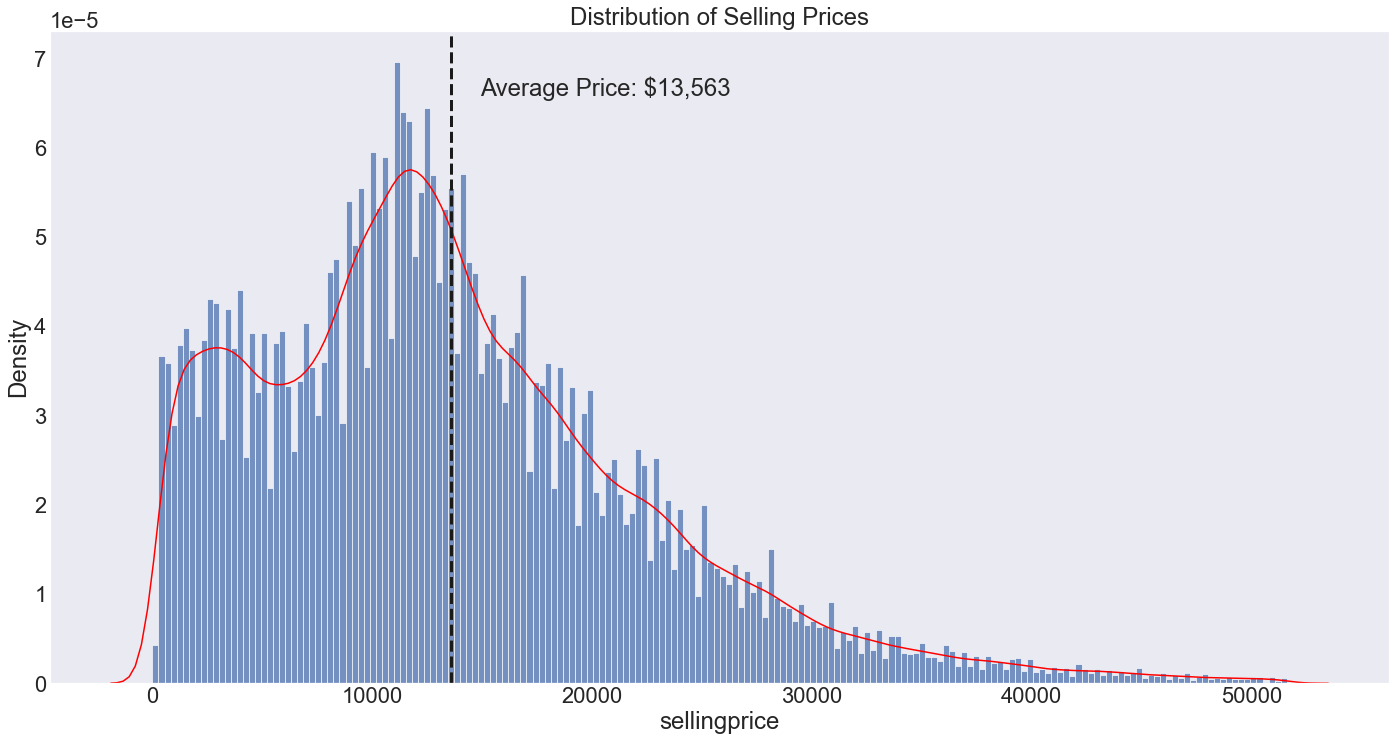

In [9]:
viz.plot_dist(df)

#### Mostly normal distribution, but higher concentration of vehicles on the low end

## Split data into 60% train, 20% validate, 20% split


In [10]:
# separate into 80% train/validate and test data
train_validate, test = train_test_split(df, test_size=.2, random_state=333)

# further separate the train/validate data into train and validate
train, validate = train_test_split(train_validate, 
                                  test_size=.25, 
                                  random_state=333)

## How does mmr relate to selling price?

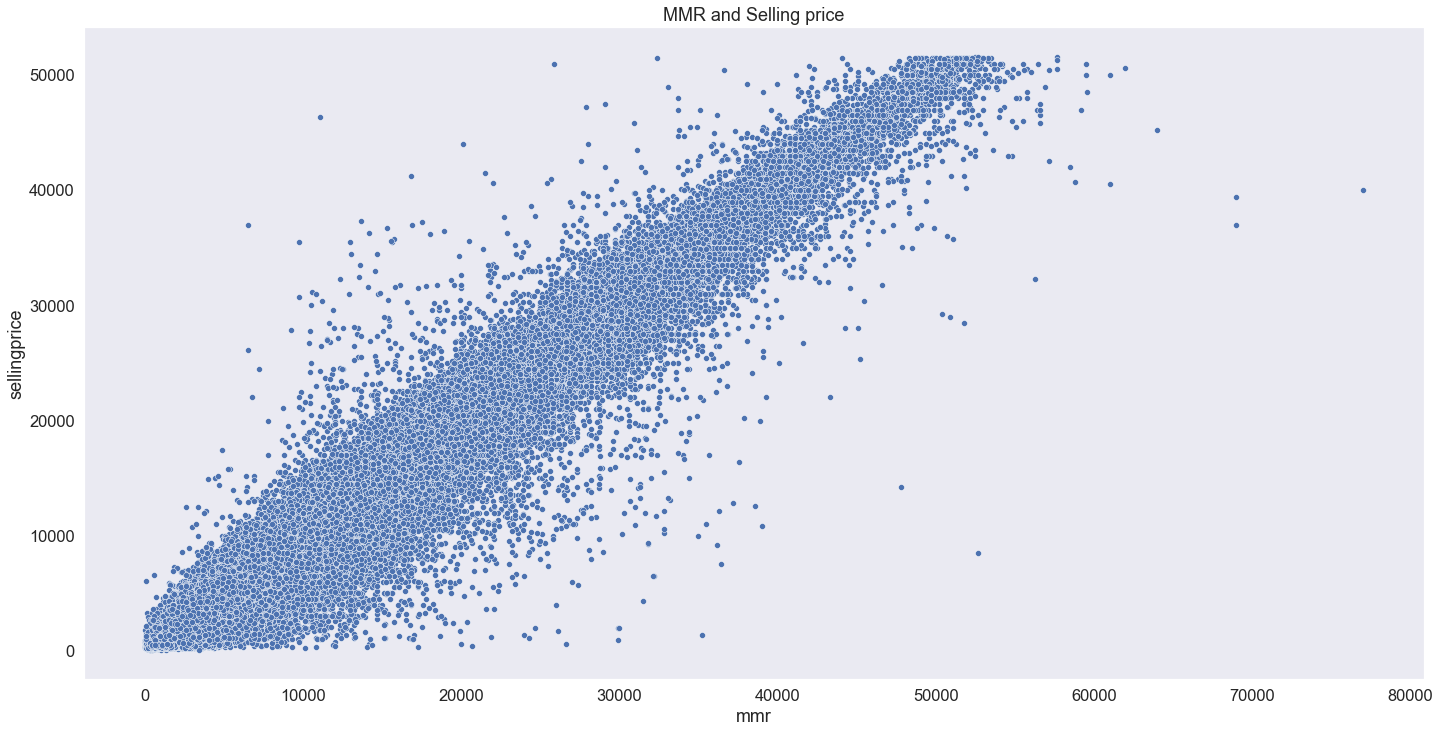

Correlation coefficient is: 0.982
Correlation is confirmed


In [11]:
viz.plot_mmr(train)



#### MMR has a very high linear correlation to selling price

## Looking at other relationships to sellingprice

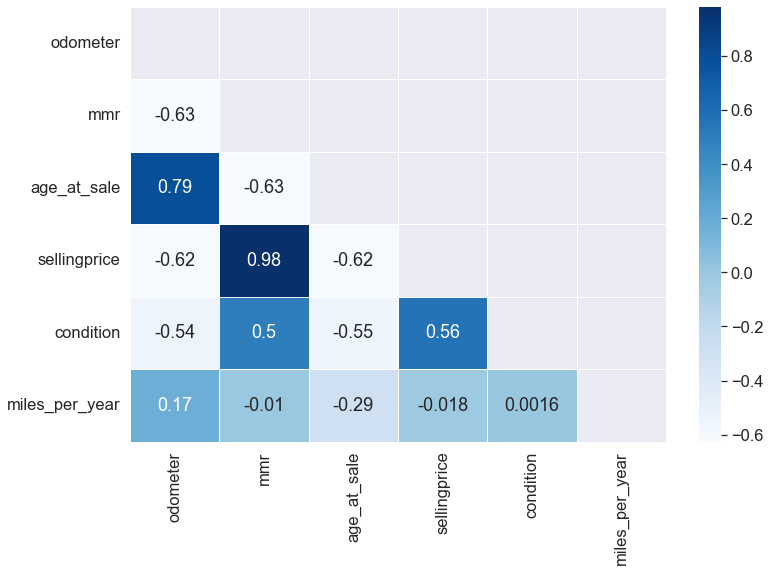

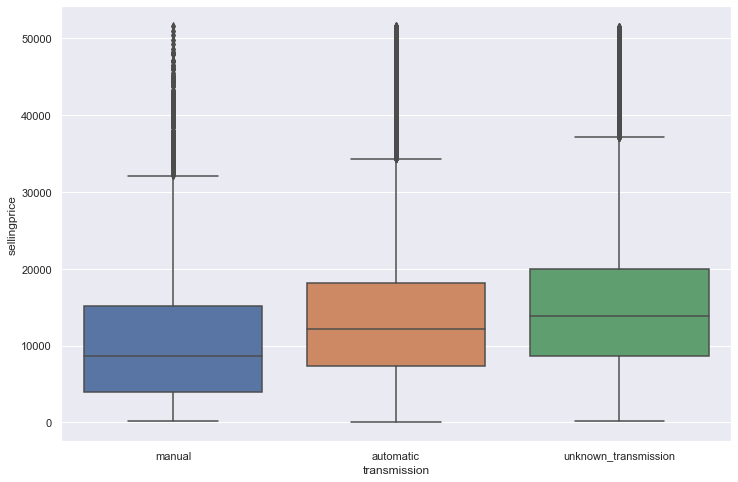

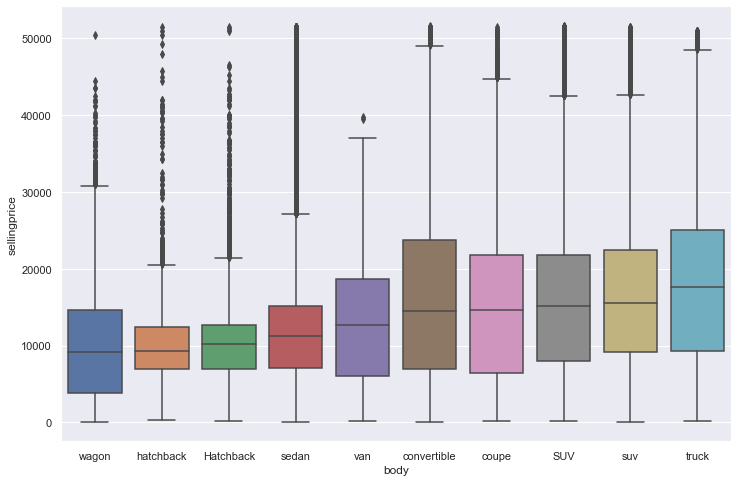

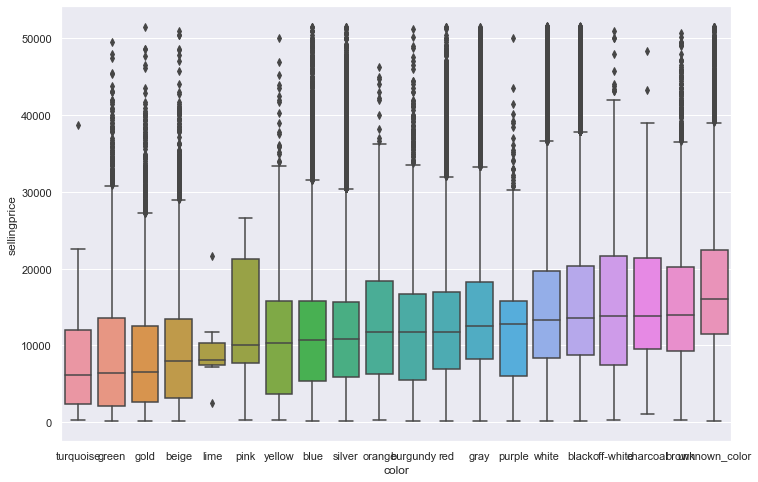

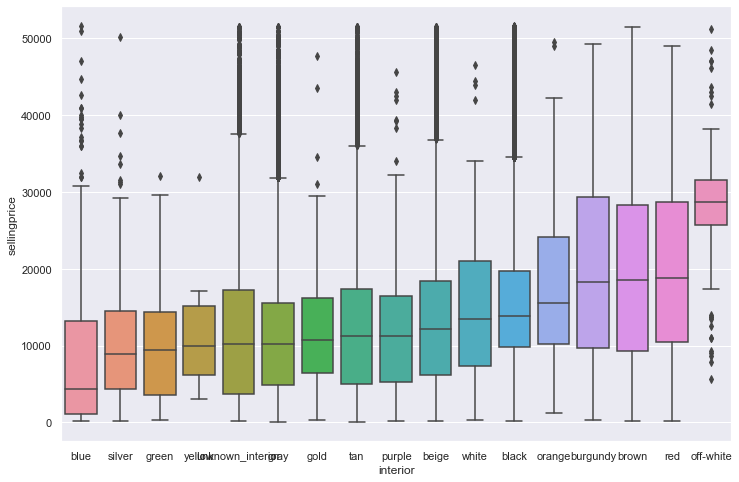

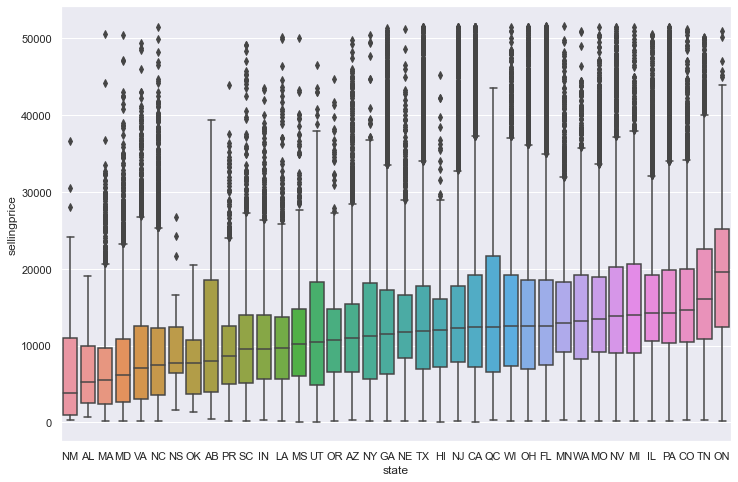

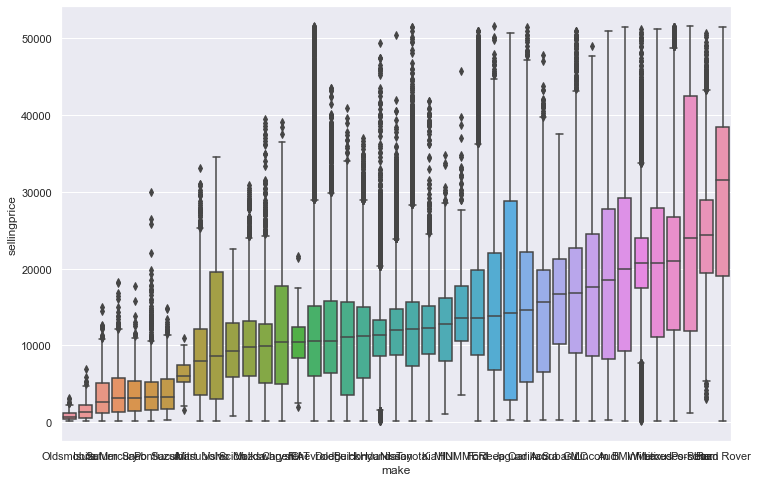

In [12]:
viz.corr_plot(train)

## Takeaways

    - selling price and mmr highly correlated
    - age correlated to odometer
    - interior and car color can be categorized (desireable/average/undesireable)
    - make can be binned
    

In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 514870 │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 19     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p75     ┃ p100     ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ year                │    0 │      0 │    2000 │     3.8 │   2000 │    2000 │    2000 │     2000 │    ▁▂▂█  │  │
│ │ condition           │    0 │      0 │     3.4 │    0.95 │      1 │     2.7 │     4.2 │        5 │   ▄▄▅█▅  │  │
│ │ odometer            │    0 │      0 │   66000 │   51000 │      1 │   28000 │   96000 │   500000 │   █▃▁    │  │
│ │ mmr                 │    0 │      0 │   14000 │    8700 │     25 │    7500 │   18000 │    77000 │   █▆▁    │  │
│ │ sellingprice        │    0 │      0 │   14000 │    8800 │      1 │    7300 │   18000 │    52000 │   ▆█▄▁   │  │
│ │ saleyear            │    0 │      0 │    2000 │    0.27 │   2000 │    2000 │    2000 │     2000 │  ▁    █  │  │
│ │ age_at_sale         │    0 │      0 │     4.7 │     3.8 │      1 │       2 │       7 │       25 │   █▂▂    │  │
│ │ miles_per_year      │    0 │      0 │   16000 │    9100 │      0 │   10000 │   20000 │   220000 │    █     │  │
│ └─────────────────────┴──────┴────────┴─────────┴─────────┴────────┴─────────┴─────────┴──────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ make                       │      0 │          0 │                            1 │                   520000 │  │
│ │ model                      │      0 │          0 │                            1 │                   520000 │  │
│ │ trim                       │      0 │          0 │                            1 │                   520000 │  │
│ │ body                       │      0 │          0 │                            1 │                   520000 │  │
│ │ transmission               │      0 │          0 │                            1 │                   520000 │  │
│ │ vin                        │      0 │          0 │                            1 │                   520000 │  │
│ │ state                      │      0 │          0 │                            1 │                   520000 │  │
│ │ color                      │      0 │          0 │                            1 │                   520000 │  │
│ │ interior                   │      0 │          0 │  

In [14]:
df.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,age_at_sale,miles_per_year
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,CA,5.0,16639,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,1,16639


In [32]:
train.groupby(['make']).sellingprice.mean().to_frame().sort_values('sellingprice')

,sellingprice
make,
Oldsmobile,901.590909
Isuzu,1701.096491
Saturn,3363.156168
Pontiac,3770.457305
Saab,3924.294355
Mercury,3967.019319
Suzuki,3998.547855
smart,6251.777778
Mitsubishi,8454.067158


In [29]:
# create list of makes in order of selling price (low to high)
make_index = train.groupby(['make']).sellingprice.mean().to_frame().sort_values('sellingprice').index

In [33]:
cheap_make = make_index[:8]
low_mid_make = make_index[8:19]
high_mid_make = make_index[19:29]
luxury_make = make_index[29:]

In [35]:
df["make_category"] = np.where(df["make"].str.in(cheap_make), 'cheap', df.make)

SyntaxError: invalid syntax (1872686110.py, line 1)